## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

%matplotlib inline

## Data Preparation

In [2]:
df = datasets.load_iris(as_frame=True)

X = df.data
y = df.target

# List of features
cols = X.columns

In [3]:
# View feature variables
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# View target variable
print(y.head())
print("********************************")
print(y.value_counts())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32
********************************
0    50
1    50
2    50
Name: target, dtype: int64


In [5]:
flowers_df = X
flowers_df['target'] = y
flowers_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Splitting data into train and test sets
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.1)

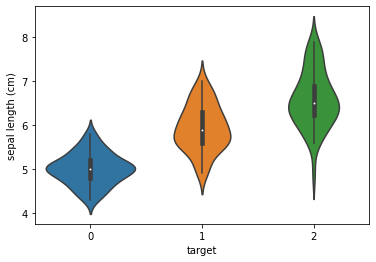

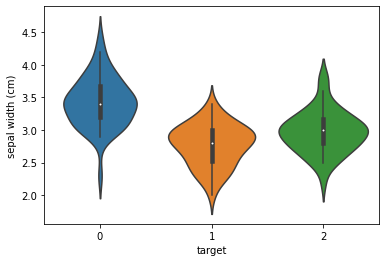

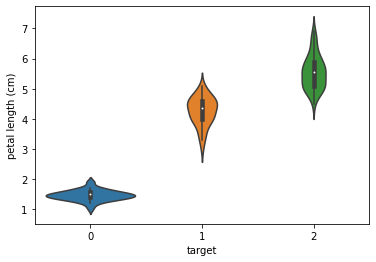

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

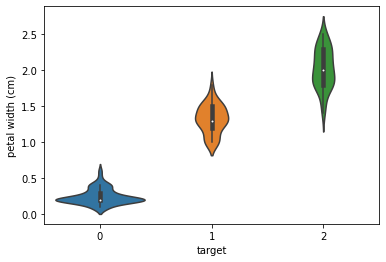

In [7]:
# Plotting the dataset
sns.violinplot(y='sepal length (cm)',x='target',data=flowers_df)
plt.show()
sns.violinplot(y='sepal width (cm)',x='target',data=flowers_df)
plt.show()
sns.violinplot(y='petal length (cm)',x='target',data=flowers_df)
plt.show()
sns.violinplot(y='petal width (cm)',x='target',data=flowers_df)

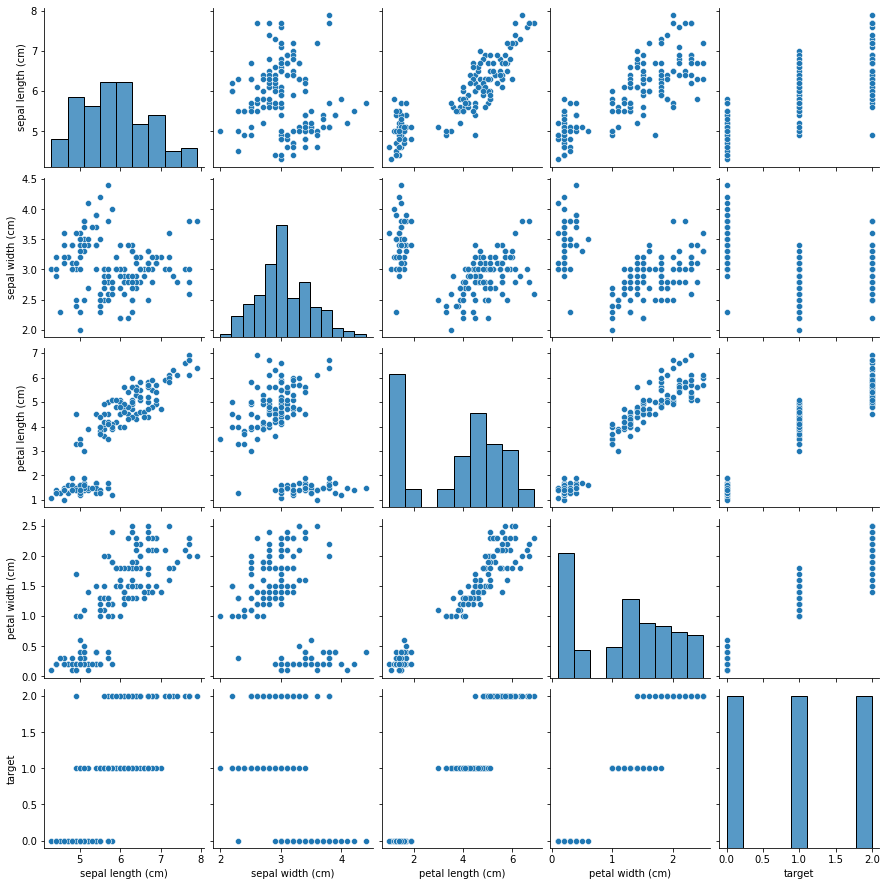

In [8]:
# Plotting the dataset
sns.pairplot(flowers_df)

# Linear Regression
Create 12 models, each on a unique dataset, created from combinations of features in the flowers dataset.
Optimisation algorithm is Stochastic Gradient Descent, Cost function is Mean Squared Error.

In [9]:
# Creating 12 datasets with unique combinations of columns, as required for the 12 Linear Regression Models
from itertools import permutations

datasets_train = {}
datasets_test = {}

lin_reg_perm = permutations(cols, 2)

print('Feature Variable, Target Variable for the 12 datasets')
for index, pair in enumerate(lin_reg_perm):
    print(pair)
    datasets_train['X_{}'.format(index)] = x_train[pair[0]]
    datasets_train['y_{}'.format(index)] = x_train[pair[1]]
    datasets_test['X_{}'.format(index)] = x_test[pair[0]]
    datasets_test['y_{}'.format(index)] = x_test[pair[1]]

Feature Variable, Target Variable for the 12 datasets
('sepal length (cm)', 'sepal width (cm)')
('sepal length (cm)', 'petal length (cm)')
('sepal length (cm)', 'petal width (cm)')
('sepal width (cm)', 'sepal length (cm)')
('sepal width (cm)', 'petal length (cm)')
('sepal width (cm)', 'petal width (cm)')
('petal length (cm)', 'sepal length (cm)')
('petal length (cm)', 'sepal width (cm)')
('petal length (cm)', 'petal width (cm)')
('petal width (cm)', 'sepal length (cm)')
('petal width (cm)', 'sepal width (cm)')
('petal width (cm)', 'petal length (cm)')


In [10]:
# Dictionary to store 12 required models
lin_reg_models = {}

# Model creation and compilation
for i in range(12):
    lin_reg_models['model_{}'.format(i+1)] = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
    lin_reg_models['model_{}'.format(i+1)].compile(optimizer='sgd', loss='mean_squared_error')

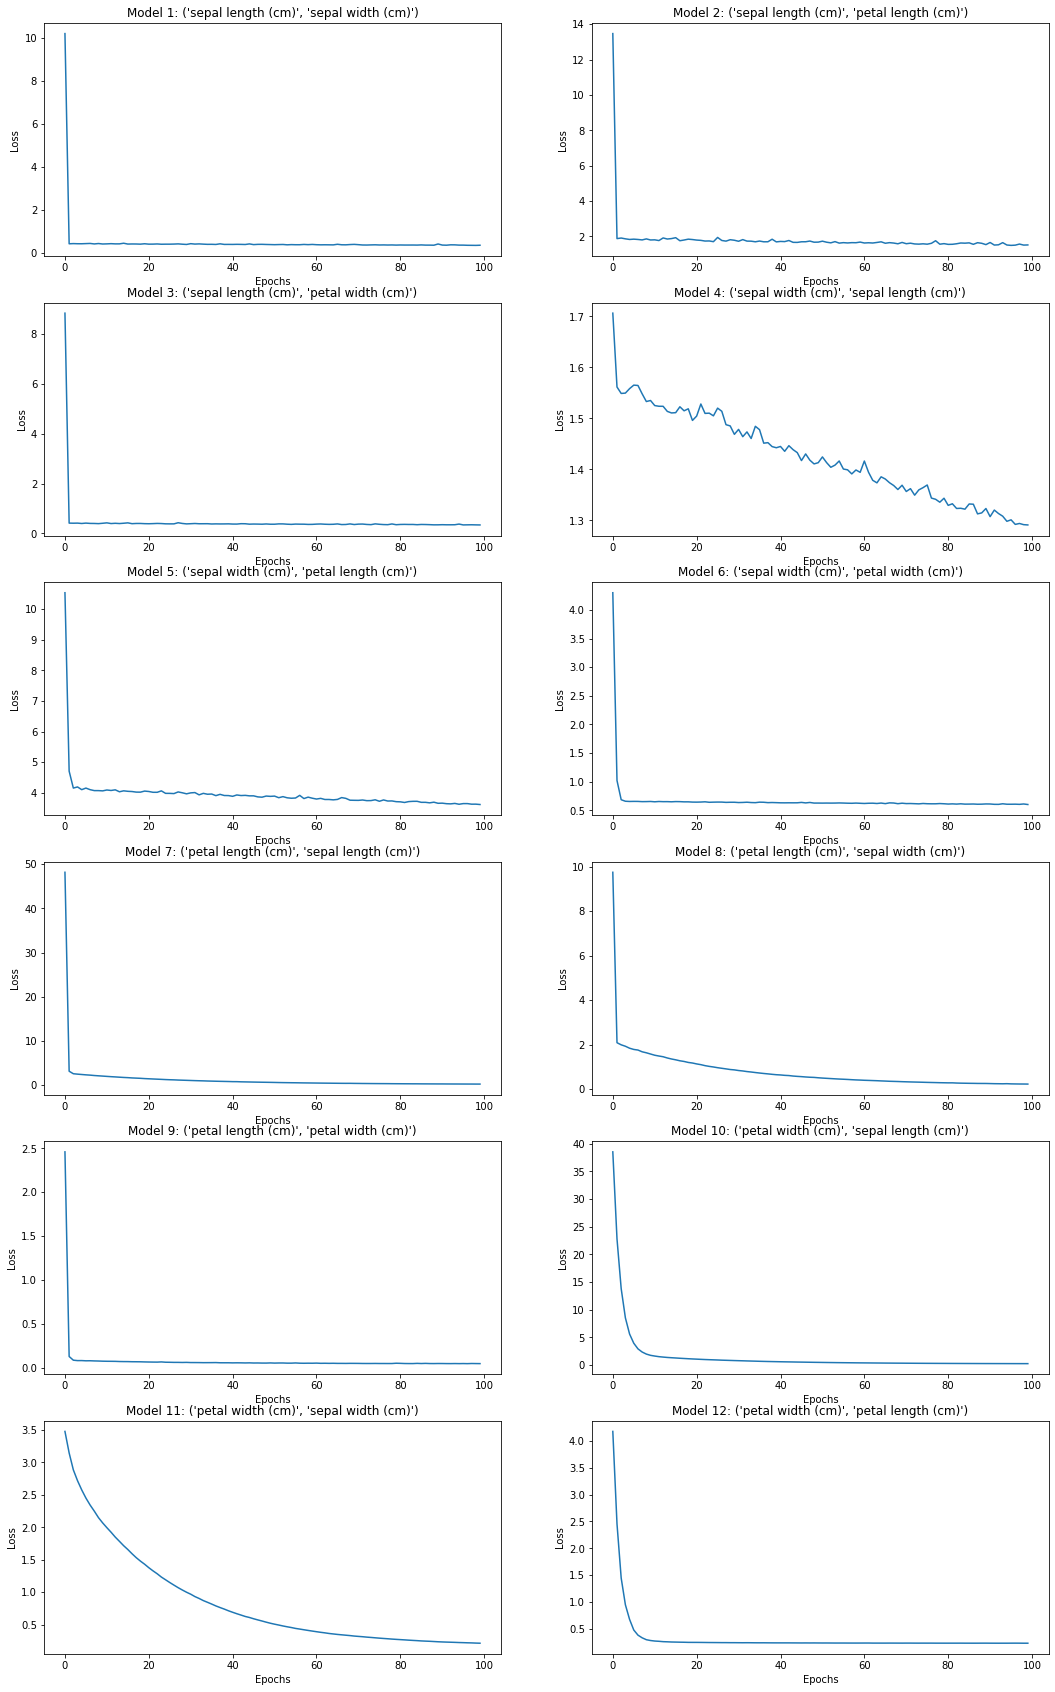

In [11]:
# Dictionary to store the histories of the 12 models
lin_reg_histories = {}

# Training the 12 models
for i in range(12):
    lin_reg_histories['model_{}'.format(i)] = lin_reg_models['model_{}'.format(i+1)].fit(datasets_train['X_{}'.format(i)], datasets_train['y_{}'.format(i)], epochs=100, batch_size=32, verbose=0)
    
figure, ax = plt.subplots(nrows=6, ncols=2, figsize=(18,30))
ax = ax.ravel()

lin_reg_perm = permutations(cols, 2)

# Plotting loss vs epoch for all models
for index, pair in enumerate(lin_reg_perm):
    ax[index].plot(lin_reg_histories['model_{}'.format(index)].history['loss'])
    ax[index].set_title('Model {}: {}'.format(index+1, pair))
    ax[index].set_xlabel('Epochs')
    ax[index].set_ylabel('Loss')

In [12]:
# Predicting on test set
for i in range(12):
    print(lin_reg_models['model_{}'.format(i+1)].evaluate(datasets_test['X_{}'.format(i)], datasets_test['y_{}'.format(i)], verbose=0, return_dict=True))

{'loss': 0.20494680106639862}
{'loss': 1.185981273651123}
{'loss': 0.362836092710495}
{'loss': 0.9017860889434814}
{'loss': 3.167773723602295}
{'loss': 0.7445231676101685}
{'loss': 0.12207159399986267}
{'loss': 0.1390371471643448}
{'loss': 0.0511585995554924}
{'loss': 0.08600538223981857}
{'loss': 0.1291075497865677}
{'loss': 0.152239590883255}


**As loss for model no. 7 is the lowest, petal length is the best predictor of sepal length**

### Comparing model weights with and without L1 Regularization

In [13]:
# Linear Regression with L1 Regularization
lr_model_with_reg = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1], kernel_regularizer=tf.keras.regularizers.l1())])

lr_model_with_reg.compile(optimizer='sgd', loss='mean_squared_error')

lr_model_with_reg.fit(datasets_train['X_0'.format(i)], datasets_train['y_0'.format(i)], epochs=100, batch_size=32, verbose=0)

lr_model_with_reg.layers[0].weights

[<tf.Variable 'dense_12/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.39218062]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(1,) dtype=float32, numpy=array([0.48154837], dtype=float32)>]

In [14]:
# Linear Regression without L1 Regularization
lr_model_without_reg = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

lr_model_without_reg.compile(optimizer='sgd', loss='mean_squared_error')

lr_model_without_reg.fit(datasets_train['X_0'.format(i)], datasets_train['y_0'.format(i)], epochs=100, batch_size=32, verbose=0)

lr_model_without_reg.layers[0].weights

[<tf.Variable 'dense_13/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.3460151]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([0.90633994], dtype=float32)>]

**Regularized model parameters:** (Can be different at reruns) \
weight = 0.39, bias = 0.77 

**Not Regularized model parameters:** (Can be different at reruns)\
weight = 0.40, bias = 0.54

# Logistic Regression
Create 6 logistic regression models, each trained on a unique dataset, comprised of a combination of input features. \
Optimisation function is Stochastic Gradient Descent, Loss function is Mean Squared Error, with L2 Regularization.

In [15]:
# Dictionary to store 6 required models
log_reg_models = {}
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

# Model creation and compilation
for i in range(6):
    log_reg_models['model_{}'.format(i+1)] = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[2], activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2())])
    log_reg_models['model_{}'.format(i+1)].compile(optimizer=opt, loss='mean_squared_error')

In [16]:
# Create 6 Train and Test Datasets of unique combinatiom of features, for logistic regression
from itertools import combinations

log_reg_datasets_train = {}
log_reg_datasets_test = {}

log_reg_combinations = combinations(cols, 2)

print('Features of each of the 6 datasets:')
for index, pair in enumerate(log_reg_combinations):
    print(list(pair))
    log_reg_datasets_train['X_{}'.format(index)] = x_train[list(pair)]
    log_reg_datasets_train['y_{}'.format(index)] = y_train
    log_reg_datasets_test['X_{}'.format(index)] = x_test[list(pair)]
    log_reg_datasets_test['y_{}'.format(index)] = y_test

Features of each of the 6 datasets:
['sepal length (cm)', 'sepal width (cm)']
['sepal length (cm)', 'petal length (cm)']
['sepal length (cm)', 'petal width (cm)']
['sepal width (cm)', 'petal length (cm)']
['sepal width (cm)', 'petal width (cm)']
['petal length (cm)', 'petal width (cm)']


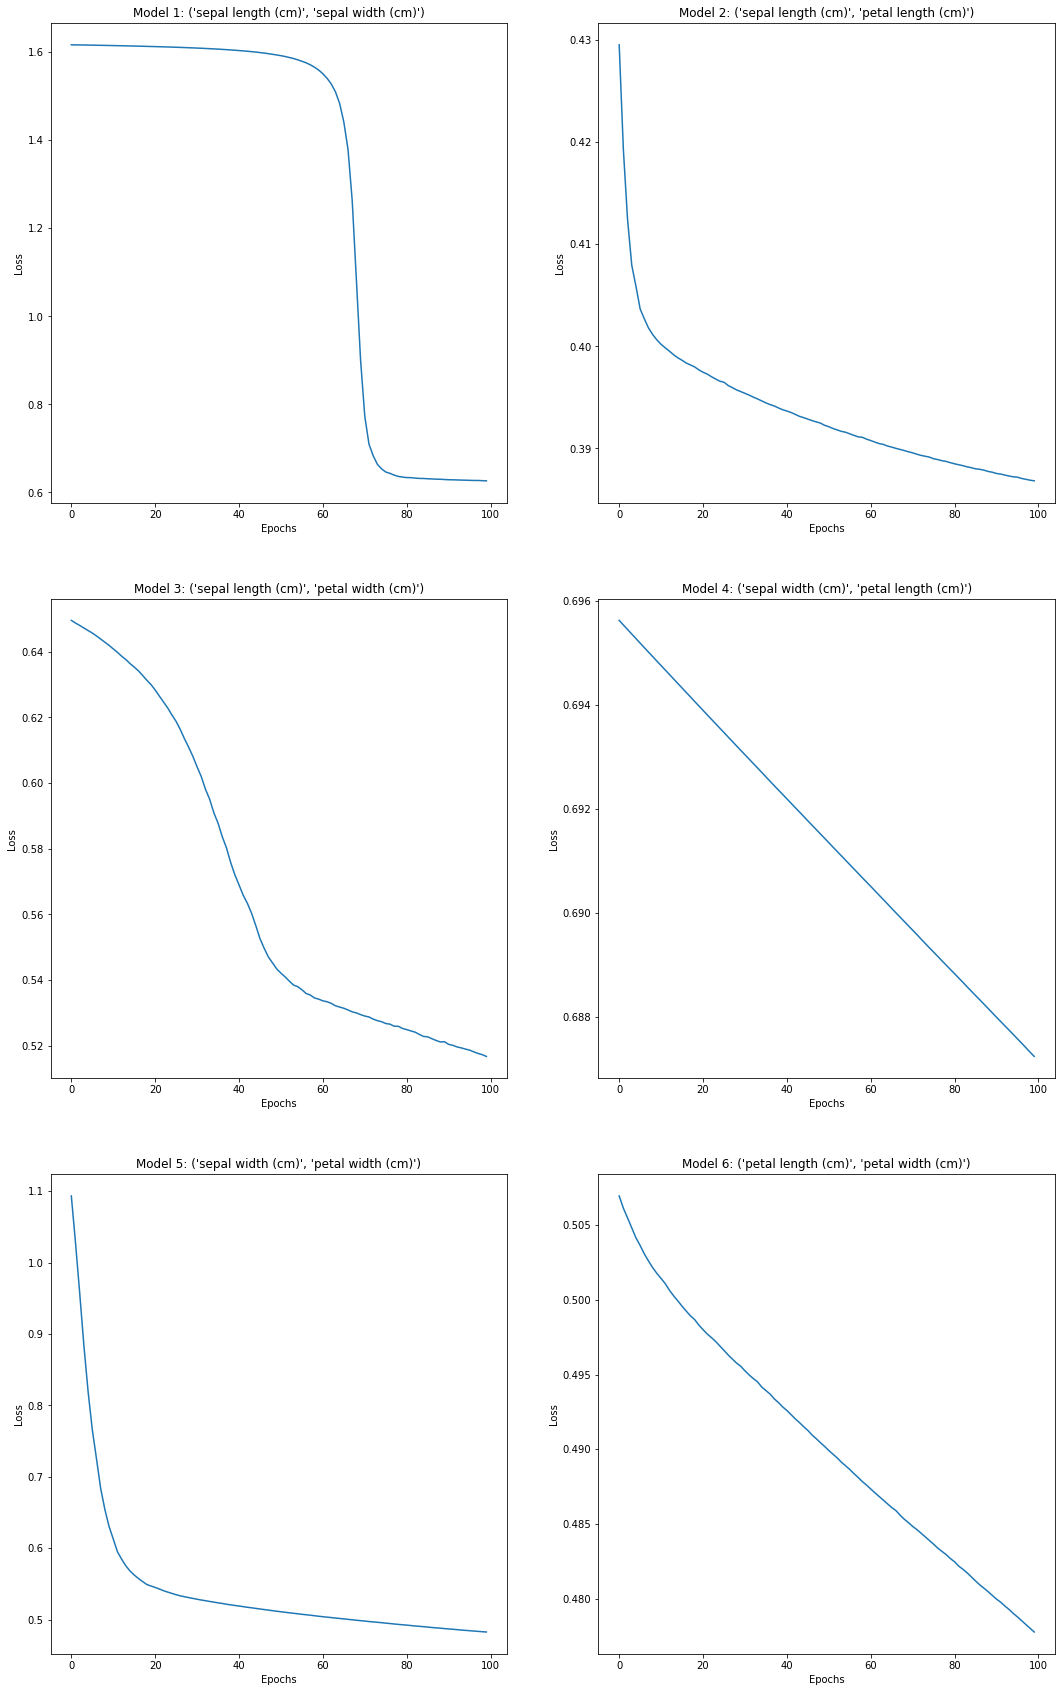

In [17]:
# Dictionary to store histories of the 6 logistic regression models
log_reg_histories = {}

# Model training
for i in range(6):
    log_reg_histories['model_{}'.format(i)] = log_reg_models['model_{}'.format(i+1)].fit(log_reg_datasets_train['X_{}'.format(i)], log_reg_datasets_train['y_{}'.format(i)], epochs=100, batch_size=32, verbose=0)
    
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,30))
ax = ax.ravel()

log_reg_combinations = combinations(cols, 2)

for j, pair in enumerate(log_reg_combinations):
    ax[j].plot(log_reg_histories['model_{}'.format(j)].history['loss'])
    ax[j].set_title('Model {}: {}'.format(j+1, pair))
    ax[j].set_xlabel('Epochs')
    ax[j].set_ylabel('Loss')

In [18]:
# Predict on test set
for i in range(6):
    print(log_reg_models['model_{}'.format(i+1)].evaluate(log_reg_datasets_test['X_{}'.format(i)], log_reg_datasets_test['y_{}'.format(i)], verbose=0, return_dict=True))

{'loss': 0.7500476241111755}
{'loss': 0.5409138202667236}
{'loss': 0.6480571627616882}
{'loss': 0.761432945728302}
{'loss': 0.6230855584144592}
{'loss': 0.6043837070465088}


**As loss of Model 3 is lowest, petal width is the most predictive of sepal width.**

## Checking effect of different learning rates on model

In [19]:
# VARYING ALPHA FOR MODEL 2
lr_list = [0.0001, 0.001, 0.01, 0.1]
log_reg_lr_change_models = {}

for i, lr in enumerate(lr_list):
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    log_reg_lr_change_models['model_{}'.format(i+1)] = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[2], activation='sigmoid')])
    log_reg_lr_change_models['model_{}'.format(i+1)].compile(optimizer=opt, loss='mean_squared_error')

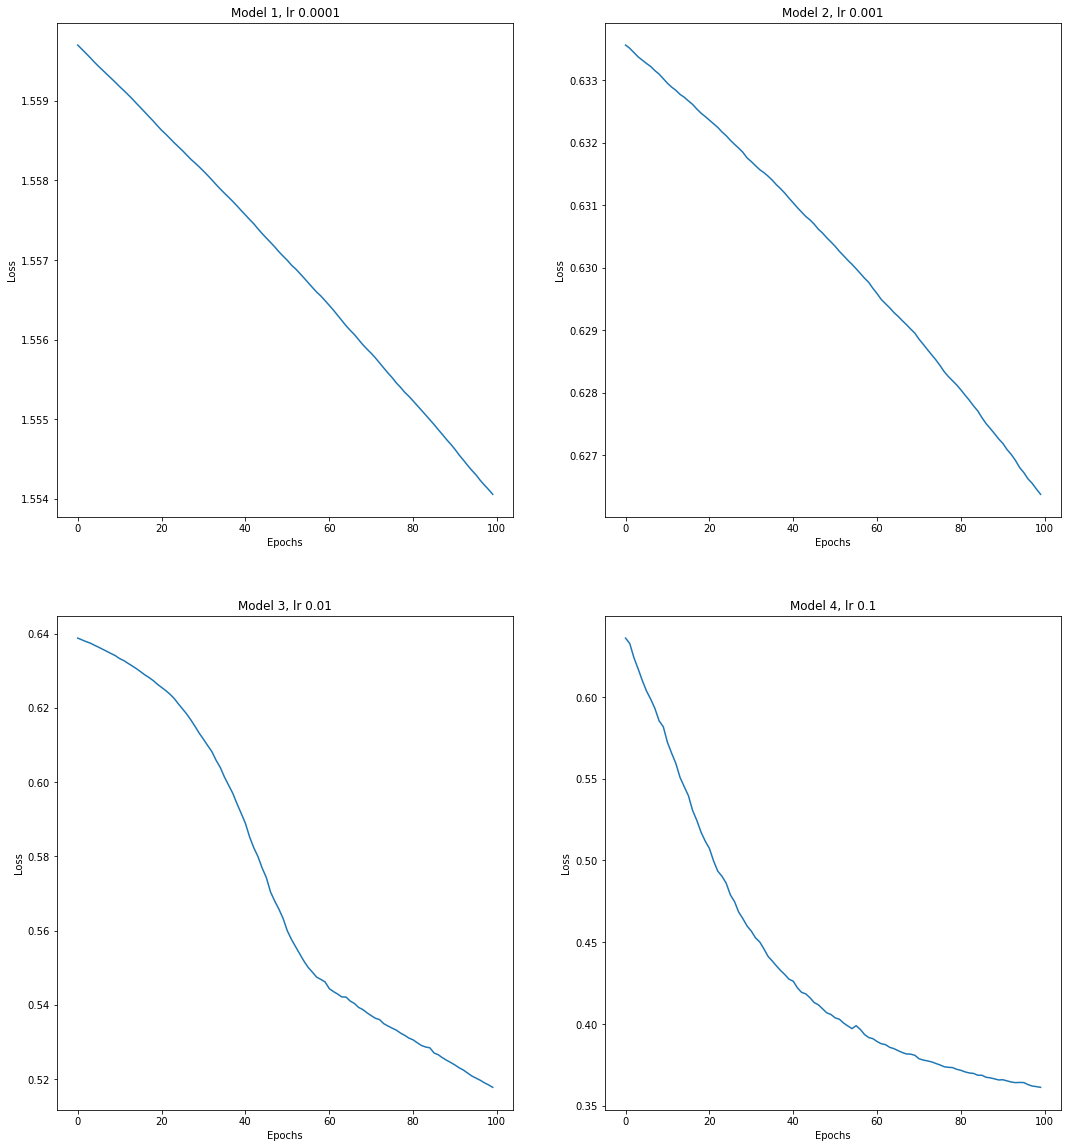

In [20]:
log_reg_lr_change_histories = {}

for i in range(4):
    log_reg_lr_change_histories['model_{}'.format(i)] = log_reg_lr_change_models['model_{}'.format(i+1)].fit(log_reg_datasets_train['X_2'], log_reg_datasets_train['y_2'], epochs=100, batch_size=32, verbose=0)
    
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 20))
ax = ax.ravel()

for j, lr in enumerate(lr_list):
    ax[j].plot(log_reg_lr_change_histories['model_{}'.format(j)].history['loss'])
    ax[j].set_title('Model {}, lr {}'.format(j+1, lr))
    ax[j].set_xlabel('Epochs')
    ax[j].set_ylabel('Loss')

**As we can see above, Model 4 with lr=0.1, which was the highest, converged the fastest.**

In [21]:
# Predict on test set
for i in range(6):
    print(log_reg_models['model_{}'.format(i+1)].evaluate(log_reg_datasets_test['X_{}'.format(i)], log_reg_datasets_test['y_{}'.format(i)], verbose=0, return_dict=True))

{'loss': 0.7500476241111755}
{'loss': 0.5409138202667236}
{'loss': 0.6480571627616882}
{'loss': 0.761432945728302}
{'loss': 0.6230855584144592}
{'loss': 0.6043837070465088}


**As loss of Model 1 is lowest, petal width is the most predictive of sepal width.**